# Question 4.1

A rock slope is to be cut as part of a road construction project. However, there is a risk that the slope could slide along the bedding planes into the excavation pit. In order to carry out a stability analysis it is necessary to estimate the angle of friction along the bedding planes. An initial assessment on the mean value of the friction angle can be obtained from the spectrum of possible manifestations of the friction angle. It cannot be smaller than the base friction angle, i.e. the friction angle that would result on the sawn, smooth surface of a specimen. The base friction angle for the greywackes that make up the slope is about 20°. The maximum possible friction angle can be estimated by back-calculating past failure cases. So far, no friction angle exceeding 35° has been back-calculated. What is the probability that the friction angle is smaller than 25°? Since no further information is available, the PDF of the friction angle can be assumed to be uniform.

In [ ]:
# In this cell, you can begin by importing the libraries you need and setting up a simple
# calculation to handle the uniform distribution between 20 and 35 degrees.
import numpy as np
from scipy import stats

# HINT:
# 1. You can model friction angles as U(20, 35).
# 2. Calculate the probability that the friction angle is below 25 degrees.
# 3. Confirm your result matches the analytical approach: (25 - 20) / (35 - 20).

# You might start coding something like this:
# lower_bound = 20
# upper_bound = 35
# desired_angle = 25

# Assign variables to the max, min, and desired friction angles
phi_max = 35
phi_min = 20
phi_25 = 25

#Defining the uniform_less_than functions
def uniform_less_than(lower_bound, upper_bound, value):
   return stats.uniform.cdf(value, loc=lower_bound, scale=upper_bound - lower_bound)

#Using the uniform_less_than_function
probability = uniform_less_than(phi_min, phi_max, phi_25)
print(f"The probability of the angle of friction being less than {phi_25} degrees is: {probability}")


The probability of the angle of friction being less than 25 degrees is: 0.3333333333333333


# Question 4.2

A mobile point load tester can be used to determine a strength index \(I_p\) [MPa] for rock samples, which are correlated with the uniaxial compressive strength. 25 strength values \(I_p\) were determined for a sandstone sequence:

4.4; 4.2; 4.5; 4.0; 4.3; 4.1; 3.9; 4.2; 4.5; 3.8; 4.0; 4.3; 4.2; 4.2;
4.1; 4.5; 4.2; 4.3; 4.1; 3.7; 4.0; 4.5; 4.6; 4.3; 4.1
(n = 25)

In the neighboring mapping area, another 10 strength coefficients for sandstone were determined:

3.7; 4.5; 4.2; 4.4; 4.3; 4.0; 3.5; 3.9; 4.3; 4.3
(n = 10)

Do both samples come from the same population?

In [ ]:
# In this cell, import the necessary libraries for statistical testing.
# A typical approach is to use scipy.stats to perform a t-test or similar.
import numpy as np
from scipy import stats

# HINT:
# 1. Store each sample in a NumPy array.
# 2. Decide on an appropriate test (e.g., an unpaired two-sample t-test).
# 3. Check assumptions (normality, variance).
# 4. Use stats.ttest_ind(...) or a non-parametric alternative if needed.

# Example starting code:
# sample1 = np.array([4.4, 4.2, 4.5, ... ])  # 25 values
# sample2 = np.array([3.7, 4.5, 4.2, ... ])  # 10 values
# ...

#Assigning data to arrays
site_A = np.array([4.4, 4.2, 4.5, 4.0, 4.3, 4.1, 3.9, 4.2, 4.5, 3.8, 4.0, 4.3, 4.2, 4.2, 4.1, 4.5, 4.2, 4.3, 4.1, 3.7, 4.0, 4.5, 4.6, 4.3, 4.1])  #Site A assigned to array
site_B = np.array([3.7, 4.5, 4.2, 4.4, 4.3, 4.0, 3.5, 3.9, 4.3, 4.3])       #Site B assigned to array


#Running t-test to tell if the materials are significantly different.
t_stat, p_value = stats.ttest_ind(site_A, site_B)
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

#If statement indicating whether or not the data sets are statistically different.
if p_value < 0.05:
    print("The data sets are statistically different.")
else:
    print("The data sets are not statistically different.")


t-statistic: 0.9296888097975631
p-value: 0.35928348941549637
The data sets are not statistically different.


In [ ]:
# Question 4.3

A construction pit of 10,000 m³ is to be excavated. The subground consists of Pleistocene sediments of which it is known that erratic blocks (boulders) occur, having an average diameter of 1.5 m. Experience shows that about 1% by volume of the excavated material in this region consists of boulders. Since special equipment is needed to extract them and delays in construction are to be expected, the contractor is interested in the probability of having to extract more boulders than experience suggests. He would also like to know what the probability is that more than ten boulders will be found.

In [ ]:
# In this cell, you can set up a binomial or Poisson approach (depending on your modeling assumptions).
import numpy as np
from scipy import stats

# HINT:
# 1. Estimate the expected number of boulders as 1% of the total volume or total 'units' of excavation.
# 2. Use a binomial model with parameters n (number of trials) and p = 0.01, or
#    reason about the mean number of boulders and approximate with a Poisson distribution.
# 3. Compute probabilities for "more boulders than expected" and for "more than ten boulders."

# Example:
# n = 10000  # or adjusted for how you're counting possible 'boulder events'
# p = 0.01
# ...

#Define Parameters
V_total = 10000       #m^3
Percentage_boulders = 0.01
V_boulders = V_total * Percentage_boulders    #m^3
D_boulder = 1.5       #m
V_indboulders = 4*np.pi*((D_boulder/2)**3)/3     #m^3
print(f"V_boulders: {V_boulders} m^3")          #total volume of boulders
print(f"V_indboulders: {V_indboulders} m^3")    #individual volume of single boulder
num_boulders = V_boulders/V_indboulders         #estimated Number of boulders
print(f"Estimated amount of boulders: {num_boulders} boulders")

#Creating poisson distribution around the 1% boulder by volume stat.
samples = stats.poisson.rvs(mu=num_boulders, size=10000)

#Calc probability of exceedance of expected amount of boulders
exceed_1 = np.sum(samples > num_boulders)/len(samples)
print(f"Probability of exceeding expected amount of boulders: {exceed_1}")


#Calc probability of exceedance of 10 boulders
exceed_2 = np.sum(samples > 10)/len(samples)
print(f"Probability of exceeding 10 boulders: {exceed_2}")





V_boulders: 100.0 m^3
V_indboulders: 1.7671458676442586 m^3
Estimated amount of boulders: 56.58842421045168 boulders
Probability of exceeding expected amount of boulders: 0.4964
Probability of exceeding 10 boulders: 1.0


# Question 4.4

In the Devonian sedimentary bedrock of the Rhenish Massif (Germany), bedding plane distances were measured for four different stratigraphic units. The coefficients of (squared) skewness and kurtosis are given as:

\[
(\beta_1^2, \beta_2) = (1.82, 4.85);\quad (1.00, 3.35);\quad (2.72, 5.71);\quad (0.52, 2.95).
\]

What statistical distribution do the bedding plane distances follow?

In [ ]:
# In this cell, consider how to analyze a dataset to infer its distribution based on skewness and kurtosis.
import numpy as np
from scipy import stats

# HINT:
# 1. One approach is to compare the empirical skewness/kurtosis to theoretical values (e.g., normal, lognormal, gamma).
# 2. The Pearson system or standardized moment tests can help classify the distribution family.
# 3. If you had actual data, you could apply stats.skew(...) and stats.kurtosis(...) and compare.

# Example steps you might take:
# measured_skew_kurt = [(1.82, 4.85), (1.00, 3.35), (2.72, 5.71), (0.52, 2.95)]
# ...

#Create array of skew and kurtosis
measured_skew_kurt = [(1.82, 4.85), (1.00, 3.35), (2.72, 5.71), (0.52, 2.95)]
sk_array = np.array(measured_skew_kurt)
print(f"Skew: {sk_array[:, 0]}")
print(f"Kurtosis: {sk_array[:, 1]}")

#Using hint No. 1


Skew: [1.82 1.   2.72 0.52]
Kurtosis: [4.85 3.35 5.71 2.95]


### Question 4.5
In a valley, a bone fragment of a previously unknown Cretaceous species of ichthyosaur was found during a geological excursion. To search for more fragments, you plan to investigate two upstream branches of the river. Branch 1 (larger) has a catchment area of 18 km², while Branch 2 (smaller) has a catchment area of 10 km². Additionally, in 35% of Branch 1’s area marine Cretaceous rocks are exposed, whereas in Branch 2 that figure is 80%. Given these data, estimate the probability that the fossil came from the larger catchment area. Explain any assumptions you make about probabilities and how you handle the likelihood of the fossil being transported from each branch.


In [ ]:
# Hints and Starting Code for Question 4.5

# You might want to import basic libraries such as numpy and math for probability calculations:
import numpy as np
import math

# Approach Hints:
# 1. Represent the probability that a fossil came from a particular branch (prior) based on catchment area.
# 2. Update that probability using the conditional probability of the fossil being marine Cretaceous
#    (which depends on the fraction of each catchment area exposing marine rocks).
# 3. Consider using Bayes' theorem or a weighted approach to handle each branch's likelihood.

# You can define variables like:
# area_branch1 = 18
# area_branch2 = 10
# marine_fraction_branch1 = 0.35
# marine_fraction_branch2 = 0.80
# Then calculate the updated probability.

#Define Variables
Area_b1 = 18
percent_marine_b1 = 0.35

Area_b2 = 10
percent_marine_b2 = 0.80

total_area = Area_b1 + Area_b2

prob_B1 = Area_b1/total_area
prob_B2 = Area_b2/total_area
print(f"Probability of Branch 1: {prob_B1}")                  #liklihood the fossil is from branch #1
print(f"Probability of Branch 2: {prob_B2}")                  #liklinhood the fossill is from branch #2

prob_marine_B1 = percent_marine_b1 * prob_B1
prob_marine_B2 = percent_marine_b2 * prob_B2
print(f"Probability of marine in Branch 1: {prob_marine_B1}")     #liklihood the fossil is a marine fossil from branch #1
print(f"Probability of marine in Branch 2: {prob_marine_B2}")     #liklihood the fossil is a marine fossil from branch #2

print("There is greater probability that the ichthyosaur fossil (a marine dinosaur) is from branch #2 relative to branch #1")


Probability of Branch 1: 0.6428571428571429
Probability of Branch 2: 0.35714285714285715
Probability of marine in Branch 1: 0.225
Probability of marine in Branch 2: 0.28571428571428575
There is greater probability that the ichthyosaur fossil (a marine dinosaur) is from branch #2 relative to branch #1


### Question 4.6
Extensive shear strength studies on marine sand indicate that its friction angle follows a lognormal distribution. The measured mean value and standard deviation of the log-transformed friction angle are reported as μ<sub>lnφ</sub> = 3.25 and σ<sub>lnφ</sub> = 0.65. Use these parameters to discuss the distribution of friction angles and to compute key statistics (e.g., the mean friction angle in degrees and its confidence intervals) assuming a lognormal model.


In [ ]:
# Hints and Starting Code for Question 4.6

import numpy as np
import math
from scipy.stats import lognorm

# Approach Hints:
# 1. Recall that if X is lognormally distributed, then ln(X) ~ N(mean, std).
# 2. Here, mean = 3.25, std = 0.65 refer to the normal distribution of ln(φ).
# 3. Use scipy.stats.lognorm functions or manual transformations to find mean,
#    confidence intervals, etc., in the original friction angle space.
#
# Example steps:
# shape = sigma_lnphi
# scale = np.exp(mu_lnphi)
# Then lognorm.mean(shape, scale=scale) can give the mean of the distribution in original units.

#Enter known parameters
mean_lnphi = 3.25
std_lnphi = 0.65

#Calculate mean
scale = np.exp(mean_lnphi)
mean = lognorm.mean(s=std_lnphi, scale=scale)
print(f"Mean: {mean} degrees")

#Calculate Std
s = std_lnphi
std = lognorm.std(s, scale=scale)
print(f"Standard Deviation: {std} degrees")

#Confidence Interval
confidence_level = 0.95
interval = lognorm.interval(confidence_level, s, scale=scale)
print(f"Confidence Interval: {interval}")         #Calculation of the confidence interval using lognormal methods.


Mean: 31.856772602684252 degrees
Standard Deviation: 23.09937238574149 degrees
Confidence Interval: (7.213998756072901, 92.20151756810759) degrees


### Question 4.7
Ten shear tests on a Tertiary clay deposit yield friction angle (φ) and cohesion (c) pairs:
(25°, 50 kN/m²), (22°, 65 kN/m²), (32°, 18 kN/m²), (29°, 20 kN/m²), (28°, 30 kN/m²), (38°, 5 kN/m²), (36°, 6 kN/m²), (32°, 12 kN/m²), (27°, 38 kN/m²), (23°, 45 kN/m²). Investigate whether there is a correlation between friction angle and cohesion. Summarize your findings on the relationship (e.g., positive, negative, or none).


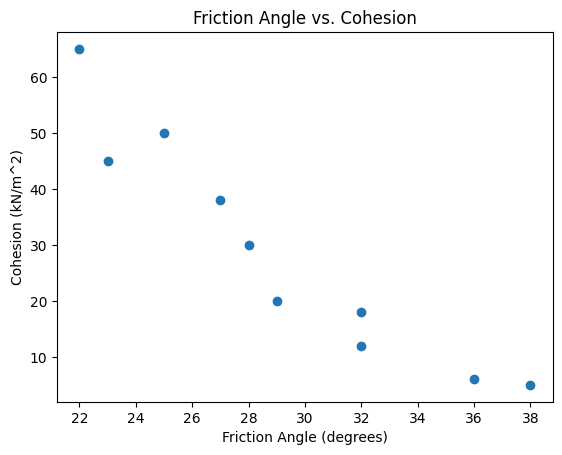

Pearson's correlation coefficient: -0.945014965790795
p-value: 3.741175599326274e-05
The correlation is statistically significant.
The pearson correlation indicates the parameters are negative related or inversely related. Also, the r value being close to -1 indicates a relatively strong correlation.


In [ ]:
# Hints and Starting Code for Question 4.7

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Approach Hints:
# 1. Store the friction angle and cohesion data in numpy arrays or a pandas DataFrame.
# 2. Plot φ vs. c to visualize potential correlation.
# 3. Calculate Pearson's correlation coefficient using pearsonr or a similar function.
# 4. Interpret whether the correlation is statistically significant and positive/negative.

# Example structure:
# phi = np.array([25, 22, 32, 29, 28, 38, 36, 32, 27, 23])
# cohesion = np.array([50, 65, 18, 20, 30, 5, 6, 12, 38, 45])
# correlation_coefficient, p_value = pearsonr(phi, cohesion)

#Create Arrays
phi = np.array([25, 22, 32, 29, 28, 38, 36, 32, 27, 23])
cohesion = np.array([50, 65, 18, 20, 30, 5, 6, 12, 38, 45])

#Plot data
plt.scatter(phi, cohesion)
plt.xlabel("Friction Angle (degrees)")
plt.ylabel("Cohesion (kN/m^2)")
plt.title("Friction Angle vs. Cohesion")
plt.show()


#Clac Pearson's correlation coefficient
correlation_coefficient, p_value = pearsonr(phi, cohesion)
print(f"Pearson's correlation coefficient: {correlation_coefficient}")
print(f"p-value: {p_value}")

#Interpret results
if p_value < 0.05:
    print("The correlation is statistically significant.")
else:
    print("The correlation is not statistically significant.")

print("The pearson correlation indicates the parameters are negative related or inversely related. Also, the r value being close to -1 indicates a relatively strong correlation.")

In [ ]:
### Question 4.8
#Monthly landslide frequency in a mountain region is documented in a histogram (Fig. 4.53). The question is whether there is a cyclic pattern or seasonal trend in landslide occurrence. Outline a method to determine if the observed frequencies are random or exhibit significant seasonality.


        Dates  Frequency
0  2022-01-01          2
1  2022-02-01          0
2  2022-03-01          4
3  2022-04-01         12
4  2022-05-01          5
5  2022-06-01          3
6  2022-07-01          1
7  2022-08-01          0
8  2022-09-01          3
9  2022-10-01          5
10 2022-11-01          2
11 2022-12-01          0
12 2023-01-01          0
13 2023-02-01          0
14 2023-03-01          2
15 2023-04-01         14
16 2023-05-01         13
17 2023-06-01          3
18 2023-07-01          1
19 2023-08-01          2
20 2023-09-01          5
21 2023-10-01          2
22 2023-11-01          3
23 2023-12-01          1
24 2024-01-01          4
25 2024-02-01          5
26 2024-03-01         15
27 2024-04-01         13
28 2024-05-01         12
29 2024-06-01          7
30 2024-07-01          0
It appears there is a seasonal increase in the number of landslides in the spring.


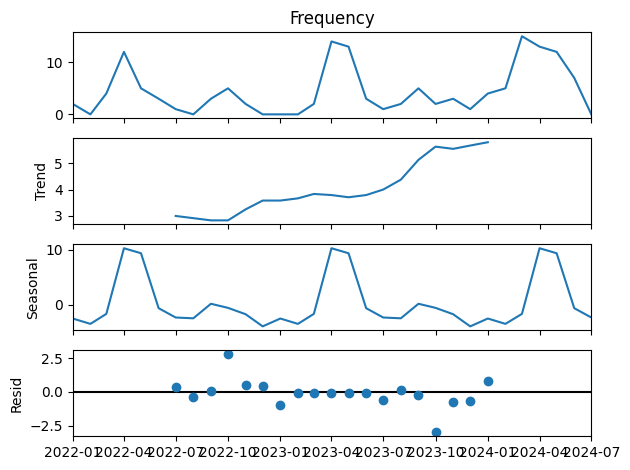

In [ ]:
# Hints and Starting Code for Question 4.8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Approach Hints:
# 1. Represent the monthly frequency data in a time series format.
# 2. Use time-series analysis, e.g., seasonal_decompose from statsmodels, to detect seasonality.
# 3. Alternatively, consider hypothesis tests for randomness or periodicity (e.g. autocorrelation plots).
# 4. Visualize the data to check for any repeating patterns across months or seasons.

#Entering Data
dates = pd.date_range(start= "2022", periods=31, freq='MS')

Frequency = pd.Series([2, 0, 4, 12, 5, 3, 1, 0, 3, 5, 2, 0, 0, 0, 2, 14, 13, 3, 1, 2, 5, 2, 3, 1, 4, 5, 15, 13, 12, 7, 0])

df1 = pd.DataFrame({'Dates': dates, 'Frequency': Frequency})
print(df1)

# Setting 'Dates' as index
df1.set_index('Dates', inplace=True)

result = seasonal_decompose(df1['Frequency'], model='additive', period=12)

result.plot()

print("It appears there is a seasonal increase in the number of landslides in the spring.")


### Question 4.9
Two boreholes have been drilled on opposite sides of a fault. The objective is to reconstruct the vertical displacement across the fault. Direct markers are lacking, but variations in mean chlorite content (Fig. 4.54) may provide an indirect measure of displacement. Propose a strategy to use cross-correlation of chlorite content profiles to estimate the fault offset. Discuss any assumptions about continuity and variability of the chlorite data in the subsurface.


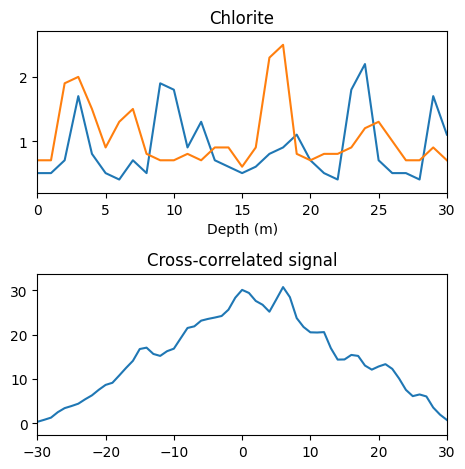

Best lag shift (fault offset): 6 meters


In [15]:
# Hints and Starting Code for Question 4.9

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate

# Approach Hints:
# 1. Represent each borehole's chlorite content profile as a 1D series of numeric values at depth intervals.
# 2. Use the scipy.signal.correlate function to compute cross-correlation between the two profiles.
# 3. Identify the lag (depth shift) that maximizes correlation as an estimate of displacement.
# 4. Carefully consider sampling intervals, data resolution, and boundary effects.

#Represent chlorite content in each borehole from Figure 4.54 in the book
Fig454 = {'Depth': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30],
          'B1': [0.5,0.5,0.7,1.7,0.8,0.5,0.4,0.7,0.5,1.9,1.8,0.9,1.3,0.7,0.6,0.5,0.6,0.8,0.9,1.1,0.7,0.5,0.4,1.8,2.2,0.7,0.5,0.5,0.4,1.7,1.1],
          'B2': [0.7,0.7,1.9,2,1.5,0.9,1.3,1.5,0.8,0.7,0.7,0.8,0.7,0.9,0.9,0.6,0.9,2.3,2.5,0.8,0.7,0.8,0.8,0.9,1.2,1.3,1,0.7,0.7,0.9,0.7]}

chlorite = pd.DataFrame(Fig454)

#Compute  correlation as function of displacement
correlate_B1_B2 = correlate(chlorite['B1'], chlorite['B2'], mode='full')

depth=chlorite['Depth']
lags=np.arange(-len(depth)+1, len(depth))

B1 = chlorite['B1']
B2 = chlorite['B2']

#Plot results
fig, (ax_B1, ax_correlate_B1_B_2) = plt.subplots(2, 1, figsize=(4.8, 4.8))
ax_B1.plot(B1)
ax_B1.set_title('Chlorite')
ax_B1.plot(B2)
ax_B1.set_xlabel('Depth (m)')

ax_correlate_B1_B_2.plot(lags, correlate_B1_B2)
ax_correlate_B1_B_2.set_title('Cross-correlated signal')

ax_B1.margins(0, 0.1)
ax_B2.margins(0, 0.1)
ax_correlate_B1_B_2.margins(0, 0.1)
fig.tight_layout()
plt.show()

#Lag Shift discussion
max_correlation_index = np.argmax(correlate_B1_B2)
best_lag_shift = lags[max_correlation_index]
print(f"Best lag shift (fault offset): {best_lag_shift} meters")


### Question 4.10
A medieval copper mine site is being converted into residential housing, and evidence of ancient copper contamination is expected. Sea thrift (Armeria maritima) is an indicator plant for copper, so its presence was recorded along a profile in 20 m × 20 m squares. The observed shoot counts are:  
3, 5, 11, 12, 8, 19, 22, 18, 11, 13  

An experimental semivariogram is to be derived from these data as a preliminary spatial analysis. Outline how you would compute and plot a semivariogram for these shoot counts, and discuss what patterns in spatial variability might imply for copper contamination distribution.


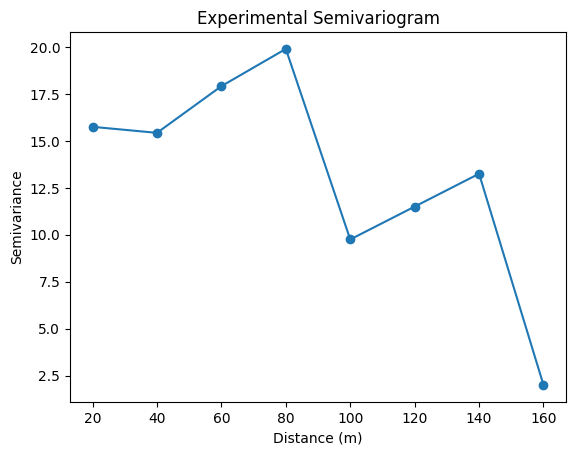

In [29]:
# Hints and Starting Code for Question 4.10

import numpy as np
import matplotlib.pyplot as plt

# Approach Hints:
# 1. Arrange the shoot counts in spatial order (e.g., as a function of distance along the profile).
# 2. Calculate pairwise distances between measurement points (assuming each square is at intervals of 20 m).
# 3. Compute the semivariogram γ(h) = 0.5 * mean[ (Z(x) - Z(x+h))^2 ] for each distance bin h.
# 4. Plot the semivariogram (γ on the y-axis vs. distance h on the x-axis) to see if there's any spatial structure.
# 5. Look for a sill, range, or nugget effect that might indicate how contamination (and thus sea thrift) is distributed.

#Spatially align shoot counts along profile
counts_profile = {'Distance':[20,40,60,80,100,120,140,160,180,200],
                  'Shoot Count': [3, 5, 11, 12, 8, 19, 22, 18, 11, 13]}
df_counts = pd.DataFrame(counts_profile)


#Calculating semivariogram for each bin
def calculate_semivariance(df_counts, lag):
    filtered_df = df_counts[df_counts['Distance'].isin(df_counts['Distance'] + lag)]
    squared_diffs = (filtered_df['Shoot Count'] - filtered_df['Shoot Count'].shift(-1))**2
    semivariance = 0.5 * np.nanmean(squared_diffs)

    return semivariance

lags = np.arange(20, 180, 20)
semivariances = [calculate_semivariance(df_counts, lag) for lag in lags]

# Plot the semivariogram
plt.plot(lags, semivariances, marker='o')
plt.title('Experimental Semivariogram')
plt.xlabel('Distance (m)')
plt.ylabel('Semivariance')
plt.show()

#Discussing Sill, Range, and Nugget
print("There does not appear to be an apparent sill and therefore range is hard to interpret. The best indication of leveling off occurs at 20 to 40 for a very short distance. Possibily too small of dataset or not defined enough")
print("There does appear to be copper contamination on the site. It is relatively widespread.")


# Question 4.11

The following rock sequences are encountered in exploratory drilling:

- Claystone (C)  
- Conglomerate (K)  
- Sandstone (S)  
- Siltstone (U)

(See Table 4.5 for the per-meter breakdown.)

**Task:**  
1. What is the probability that conglomerate (K) will be drilled again in the *next* meter of drilling?  
2. What is the probability that conglomerate will be drilled again in the *next-but-one* meter of drilling?

You may assume that the encountered rock types can be treated as sequential observations of a Markov process or using simpler independence assumptions (depending on your interpretation of the problem’s statement).

In [40]:
# Use this cell to start setting up your approach in Python.
# Possible steps:
# 1. Represent the rock sequences as a list or array.
# 2. Construct transition probabilities from the data if needed.
# 3. Calculate probabilities for "next meter" and "next-but-one meter."

import numpy as np

# HINT:
# - If you treat each meter drilled as a step in a Markov chain, you need a 4x4 transition matrix
#   (C, K, S, U) or some simpler approach based on frequencies.
# - Probability that K appears next might come directly from the row in the matrix corresponding
#   to the current rock type.
# - For the 'next-but-one' question, you might multiply transition matrices (e.g., T^2).

#Creating lists from the Table 4.5 in book.
C = 'Claystone'
K = 'Conglomerate'
S = 'Sandstone'
U = 'Siltstone'

B1 = [U,U,U,U,U,U,U,U,U,U,K,K,K,K,K,K,K,K,K,K,K,K,K,K,K,K,K,K,K,K]
B2 = [S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,S,K,K,K,K,K,K,K,K,K,K]
B3 = [K,K,K,K,K,K,K,K,K,K,S,S,S,S,S,S,S,S,S,S,U,U,U,U,U,U,U,U,U,U]
B4 = [S,S,S,S,S,S,S,S,S,S,K,K,K,K,K,K,K,K,K,K]
B5 = [S,S,S,S,S,S,S,S,S,S,C,C,C,C,C,C,C,C,C,C]
B6 = [K,K,K,K,K,K,K,K,K,K,U,U,U,U,U,U,U,U,U,U]
B7 = [K,K,K,K,K,K,K,K,K,K,S,S,S,S,S,S,S,S,S,S]
B8 = [C,C,C,C,C,C,C,C,C,C,S,S,S,S,S,S,S,S,S,S]
B9 = [U,U,U,U,U,U,U,U,U,U,S,S,S,S,S,S,S,S,S,S]
B10 = [S,S,S,S,S,S,S,S,S,S,K,K,K,K,K,K,K,K,K,K]

combined = B1 + B2 + B3 + B4 + B5 + B6 + B7 + B8 + B9 + B10

#Creating 4x4 transition matrix

transitions = {
    (C, C): 0, (C, K): 0, (C, S): 0, (C, U): 0,
    (K, C): 0, (K, K): 0, (K, S): 0, (K, U): 0,
    (S, C): 0, (S, K): 0, (S, S): 0, (S, U): 0,
    (U, C): 0, (U, K): 0, (U, S): 0, (U, U): 0
}

for i in range(len(combined) - 1):
    current_type = combined[i]
    next_type = combined[i + 1]
    transitions[(current_type, next_type)] += 1

transition_matrix = np.zeros((4, 4))
type_indices = {C: 0, K: 1, S: 2, U: 3}


for (from_type, to_type), count in transitions.items():
    from_index = type_indices[from_type]
    to_index = type_indices[to_type]

    total_from_type = combined.count(from_type)
    if total_from_type > 0:
        transition_matrix[from_index, to_index] = count / total_from_type

print("Transition Matrix:")
print(transition_matrix)

#Probabilities that next rock type encountered at 21 m in boring B4 will be conglomerate "K"
current_type = B4[-1]
next_type = K
current_index = type_indices[current_type]
next_index = type_indices[next_type]
probability_next = transition_matrix[current_index, next_index]
print(f"The probability that the next value in B4 will be K is: {probability_next}")


probability_nbo = 0
for intermediate_index in range(len(type_indices)):  # Iterate through all possible intermediate states
    # Probability of transitioning to the intermediate state
    prob_to_intermediate = transition_matrix[current_index, intermediate_index]

    # Probability of transitioning from the intermediate state to K
    prob_from_intermediate_to_k = transition_matrix[intermediate_index, next_index]

    # Add the probability of this path to the total probability
    probability_nbo += prob_to_intermediate * prob_from_intermediate_to_k

print(f"The probability that the next-but-one value in B4 will be K is: {probability_nbo}")




Transition Matrix:
[[0.9        0.05       0.05       0.        ]
 [0.         0.925      0.05       0.0125    ]
 [0.02222222 0.03333333 0.92222222 0.02222222]
 [0.         0.05       0.05       0.9       ]]
The probability that the next value in B4 will be K is: 0.925
The probability that the next-but-one value in B4 will be K is: 0.8579166666666668


# Question 4.12

The following orientation data (dip direction α / dip β) for bedding planes are recorded (n=14):

123/25, 147/22, 120/24, 111/24, 142/26, 133/27, 135/22, 156/21,  
110/25, 101/25, 133/20, 123/22, 145/25, 126/24

**Task:**  
1. Determine the mean resultant length.  
2. Determine the dip direction and dip of the mean vector.  
3. Determine the spherical standard deviation and the spherical confidence interval of the mean vector for an error probability of α = 0.1.

In [67]:
# Use this cell to load and process the orientation data.
# HINT:
# 1. Convert the dip direction/dip pairs into unit vectors in 3D space.
# 2. Sum these vectors, and derive the resultant direction and magnitude.
# 3. Calculate relevant statistics (standard deviation, confidence intervals) on a sphere.

import numpy as np

# Example structure:
# data = [(123,25), (147,22), (120,24), ...]
# Then convert each (alpha, beta) to x,y,z components on the unit sphere.
# Summation and geometry yield the mean vector direction and length.
#
# You might consider using spherical to Cartesian conversions:
# x = cos(dip) * sin(direction)
# y = cos(dip) * cos(direction)
# z = sin(dip)
# (in radians)

#Enter dip and dip direction data.
dip_data = [(123,25), (147,22), (120,24), (111,24), (142,26), (133,27), (135,22), (156,21), (110,25), (101,25), (133,20), (123,22), (145,25), (126,24)]

dip_df = pd.DataFrame(dip_data, columns=['Dip Direction', 'Dip'])

n = 14

#Converting the spherical coords to cartesian
def catesian_coords(dip_df):
  dip_df['x'] = np.cos(np.radians(dip_df['Dip'])) + np.sin(np.radians(dip_df['Dip Direction']))
  dip_df['y'] = np.cos(np.radians(dip_df['Dip'])) + np.cos(np.radians(dip_df['Dip Direction']))
  dip_df['z'] = np.sin(np.radians(dip_df['Dip']))

  dip_df['Dip Direction'] = (dip_df['Dip Direction'] + 360) % 360
  return

catesian_coords(dip_df)
print(dip_df)

#Sum vectors components

x = dip_df['x'].sum()
y = dip_df['y'].sum()
z = dip_df['z'].sum()


#Calculate Resultant Length
resultant_length = np.sqrt(x**2 + y**2 + z**2)
print(f"Resultant Length: {resultant_length}")

#Calculate Mean Vector
mean_vector = np.array([x/n, y/n, z/n])
print(f"Mean Vector: {mean_vector}")

result_dip_rad = np.arcsin(mean_vector[2])
result_dip = np.degrees(result_dip_rad)
print(f"Resultant Dip: {result_dip} degrees")

result_direction_rad = np.arctan2(mean_vector[0], mean_vector[1])
result_direction = np.degrees(result_direction_rad)
result_direction_adjusted = (90-result_direction) % 360

print(f"Resultant Direction: {result_direction_adjusted} degrees")


    Dip Direction  Dip         x         y         z
0             123   25  1.744978  0.361669  0.422618
1             147   22  1.471823  0.088513  0.374607
2             120   24  1.779571  0.413545  0.406737
3             111   24  1.847126  0.555178  0.406737
4             142   26  1.514456  0.110783  0.438371
5             133   27  1.622360  0.209008  0.453990
6             135   22  1.634291  0.220077  0.374607
7             156   21  1.340317  0.020035  0.358368
8             110   25  1.846000  0.564288  0.422618
9             101   25  1.887935  0.715499  0.422618
10            133   20  1.671046  0.257694  0.342020
11            123   22  1.765854  0.382545  0.374607
12            145   25  1.479884  0.087156  0.422618
13            126   24  1.722562  0.325760  0.406737
Resultant Length: 24.381596985542284
Mean Vector: [1.6663003  0.30798214 0.40194661]
Resultant Dip: 23.69992680144222 degrees
Resultant Direction: 10.471795100759508 degrees
